<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Projetos de Data Science
</h1>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este Notebook concentra a descrição do Projeto de Análise de Churn para a empresa Telco.  </i> 
</p>  

# <font color='red' style='font-size: 40px;'> Problemática </font>
<hr style='border: 2px solid red;'>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> TELCO é uma empresa jovem e com muito potencial, cujas filiais estão localizadas em 1.106 cidades do estado da Califórnia, Estados Unidos. Embora apresente bons resultados, a CEO da empresa queria entender como diminuir a perda de clientes na TELCO. Dado esta problemática, ficou acordado o desenvolvimento de um relatório analítico a fim de detectar os principais motivos de Churn, bem como um modelo para combater a situação.</i> 
</p>  



# <font color='red' style='font-size: 40px;'> Bibliotecas Utilizadas </font>
<hr style='border: 2px solid red;'>

In [37]:
## Bibliotecas De Manipulação de Dados e Visualização
import pandas as pd 
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objects as go

## Bibliotecas de Modelagem Matemática e Estatística
import numpy as np
import scipy as sp 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Bibliotecas de Manipulação de Tempo
import time
import datetime

# Bibliotecas de Seleção de Modelos
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.inspection import permutation_importance
from skopt import BayesSearchCV
import shap

# Bibliotecas de Pré-Processamento e Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer

# Bibliotecas de Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Bibliotecas de Métricas de Machine Learning
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Parâmetros de Otimização
import warnings
%matplotlib inline
sns.set()
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

# <font color='red' style='font-size: 40px;'> Funções </font>
<hr style='border: 2px solid red;'>

## Funções de Visualização

* Plota Barras 

In [2]:
def plota_barras(lista_variaveis, hue, df, linhas, colunas):
    if hue != False:
        if (linhas == 1) and (colunas == 1):
            k = 0
            ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', hue = hue, palette={'Yes':'#1FB3E5', 'No':'#696969'})
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
            ax.set_ylabel(f'Quantidade', fontsize = 14)
            total = []
            for bar in ax.patches:
                height = bar.get_height()
                total.append(height)
            total = sum(total)
            
            sizes = []
            for bar in ax.patches:
                height = bar.get_height()
                sizes.append(height)
                ax.text(bar.get_x() + bar.get_width()/1.6,
                        height+200,
                        f'{round((height/total)*100, 2)}%',
                        ha = 'center',
                        fontsize = 12
                )
            ax.set_ylim(0, max(sizes)*1.1)
            plt.show()
        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[j], hue = hue, palette={'Yes':'#1FB3E5', 'No':'#696969'})
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i], hue = hue, palette={'Yes':'#1FB3E5', 'No':'#696969'})
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
        else: 
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i, j], hue = hue, palette={'Yes':'#1FB3E5', 'No':'#696969'})
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
    else:
        if (linhas == 1) and (colunas == 1):
            k = 0
            ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', color='#1FB3E5')
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
            ax.set_ylabel(f'Quantidade', fontsize = 14)
            total = []
            for bar in ax.patches:
                height = bar.get_height()
                total.append(height)
            total = sum(total)
            
            sizes = []
            for bar in ax.patches:
                height = bar.get_height()
                sizes.append(height)
                ax.text(bar.get_x() + bar.get_width()/1.6,
                        height+200,
                        f'{round((height/total)*100, 2)}%',
                        ha = 'center',
                        fontsize = 12
                )
            ax.set_ylim(0, max(sizes)*1.1)
            plt.show()

        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[j], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
        else:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i, j], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1


* Plota Histogramas 

In [3]:
def plota_histograma(variavel, hue, df, titulo):
    if hue != False:
        mediana1 = df.loc[df[hue] == 'Yes'][variavel].median()
        media1 = round(df.loc[df[hue] == 'Yes'][variavel].mean(), 2)
        mediana2 = df.loc[df[hue] == 'Yes'][variavel].median()
        media2 = round(df.loc[df[hue] == 'Yes'][variavel].mean(), 2)
        plt.figure(figsize = (14, 4))
        sns.histplot(data = df, x = variavel, multiple="dodge", shrink=.8, hue = hue, palette={'Yes':'#1FB3E5', 'No':'#696969'}, bins = 60)
        plt.title(f'Distribuição {titulo}', fontsize = 16)
        plt.xlabel('Intervalo de Valores', fontsize = 14)
        plt.ylabel('Frequência', fontsize = 14)
        plt.axvline(x = mediana1, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana Churn = {mediana1}')
        plt.axvline(x = media1, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media Churn = {media1}')
        plt.axvline(x = mediana2, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana No Churn = {mediana2}')
        plt.axvline(x = media2, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media No Churn = {media2}')
        plt.grid(False)
        plt.box(False)
        plt.legend(loc = 'best')
        plt.tight_layout()
        plt.show()
    else:
        mediana = df[variavel].median()
        media = round(df[variavel].mean(), 2)
        plt.figure(figsize = (14, 4))
        sns.histplot(data = df, x = variavel, multiple="dodge", shrink=.8, color = '#1FB3E5', bins = 60)
        plt.title(f'Distribuição {titulo}', fontsize = 16)
        plt.xlabel('Intervalo de Valores', fontsize = 14)
        plt.ylabel('Frequência', fontsize = 14)
        plt.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
        plt.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
        plt.grid(False)
        plt.box(False)
        plt.legend(loc = 'best')
        plt.tight_layout()
        plt.show()

* Plota Boxplot

In [4]:
def plota_boxplot(variavel, hue, df, titulo):
    if hue != False:
        plt.figure(figsize = (7, 4))
        sns.boxplot(data = df, x = variavel, orient = 'h', y = hue, palette={'Yes':'#1FB3E5', 'No':'#696969'})
        plt.title(f'Boxplot {titulo}', fontsize = 16)
        plt.xlabel('Intervalo de Valores', fontsize = 14)
        plt.grid(False)
        plt.box(False)
        plt.tight_layout()
        plt.show()
    else: 
        plt.figure(figsize = (7, 4))
        sns.boxplot(data = df, x = variavel, orient = 'h', color = '#1FB3E5')
        plt.title(f'Boxplot {titulo}', fontsize = 16)
        plt.xlabel('Intervalo de Valores', fontsize = 14)
        plt.grid(False)
        plt.box(False)
        plt.tight_layout()
        plt.show()

## Funções de Pré-Processamento

* Separa entre Treino e Teste

In [5]:
def separa_treino_teste(target, dados, size):
    x = dados.drop(target, axis = 1)
    y = dados[target]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= size, random_state = 42)

    df_train = pd.concat([x_train, y_train], axis = 1)
    df_test = pd.concat([x_test, y_test], axis = 1)

    return df_train, df_test

* Realiza Encoding

In [6]:
def label_encoding(variavel, df):
    df[variavel] = df[variavel].replace({'Yes':1, 'No':0})
    return df[variavel]

* Seleciona as variáveis iniciais 

In [7]:
def variaveis_iniciais(lista_variaveis, target, df):
    df = df.drop(lista_variaveis, axis = 1)
    df[target] = label_encoding(target, df)
    for variavel in df.columns:
        df.rename({variavel:variavel.replace(' ', '_').lower()}, axis = 'columns', inplace = True)
    return df

## Funções de Machine Learning

* Métricas de Machine Learning

In [8]:
def metricas(classificador, y_train, y_predict_train, y_test, y_predict_test, validacao_cruzada):

    if validacao_cruzada == True:
        accuracy = accuracy_score(y_test, y_predict_test)
        precision = precision_score(y_test, y_predict_test)
        recall = recall_score(y_test, y_predict_test)
        f1 = f1_score(y_test, y_predict_test)
        roc_curve = roc_auc_score(y_test, y_predict_test)
        metricas_teste = pd.DataFrame({'Acuracia':accuracy, 'Precisao':precision, 'Recall':recall, 'F1':f1, 'Roc_Curve':roc_curve, 'Etapa':'teste','Classificador':classificador}, index = np.arange(1, 2))
        metricas_finais = metricas_teste.copy()
        
    else: 
        accuracy = accuracy_score(y_train, y_predict_train)
        precision = precision_score(y_train, y_predict_train)
        recall = recall_score(y_train, y_predict_train)
        f1 = f1_score(y_train, y_predict_train)
        roc_curve = roc_auc_score(y_train, y_predict_train)
        metricas_treino = pd.DataFrame({'Acuracia':accuracy, 'Precisao':precision, 'Recall':recall, 'F1':f1, 'Roc_Curve':roc_curve, 'Etapa':'treino','Classificador':classificador}, index = np.arange(1))

        accuracy = accuracy_score(y_test, y_predict_test)
        precision = precision_score(y_test, y_predict_test)
        recall = recall_score(y_test, y_predict_test)
        f1 = f1_score(y_test, y_predict_test)
        roc_curve = roc_auc_score(y_test, y_predict_test)
        metricas_teste = pd.DataFrame({'Acuracia':accuracy, 'Precisao':precision, 'Recall':recall, 'F1':f1, 'Roc_Curve':roc_curve, 'Etapa':'teste','Classificador':classificador}, index = np.arange(1, 2))
        metricas_finais = pd.concat([metricas_treino, metricas_teste])
    
    return metricas_finais

def metricas_modelos_juntos(lista_modelos):
    metricas_modelos = pd.concat(lista_modelos).set_index('Classificador')
    return metricas_modelos

* Validação Cruzada 

In [29]:
def validacao_cruzada(x_train, y_train, n_splits, classificador):
    categoricas = [column for column in x_train.columns if x_train[column].dtype.name == 'object']
    numericas = [column for column in x_train.columns if x_train[column].dtype.name == 'int']

    pipeline_categoricas = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value = 'missing')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse = False))
    ])

    pipeline_numericas = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler())
    ])

    pre_processamento = ColumnTransformer([
        ('cat', pipeline_categoricas, categoricas),
        ('num', pipeline_numericas, numericas)
    ])

    kfold = KFold(n_splits = n_splits, shuffle = True, random_state = 42)
    if classificador == 'Regressão Logística':
        model = make_pipeline(pre_processamento, LogisticRegression(random_state = 42, class_weight = {0: 1, 1: 3}))
        accuracy = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy').mean()
        precision = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'precision').mean()
        recall = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'recall').mean()
        f1 = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy').mean()
        roc_curve = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'roc_auc').mean()

    elif classificador == 'SVC':
        model = make_pipeline(pre_processamento, SVC(random_state = 42, kernel = 'linear', C = 0.05, class_weight = {0: 1, 1: 3}))
        accuracy = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy').mean()
        precision = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'precision').mean()
        recall = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'recall').mean()
        f1 = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy').mean()
        roc_curve = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'roc_auc').mean()

    elif classificador == 'Random Forest':
        model = make_pipeline(pre_processamento, RandomForestClassifier(random_state = 42, criterion='entropy', n_estimators=100, max_depth= 7, class_weight = {0: 1, 1: 3}))
        accuracy = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy').mean()
        precision = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'precision').mean()
        recall = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'recall').mean()
        f1 = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy').mean()
        roc_curve = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'roc_auc').mean()

    else:
        model = make_pipeline(pre_processamento, XGBClassifier(random_state = 42, n_estimators=200, max_depth= 2, learning_rate = 0.8, eval_metric = 'logloss', objective='binary:logistic', scale_pos_weight = 3))
        accuracy = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy').mean()
        precision = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'precision').mean()
        recall = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'recall').mean()
        f1 = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy').mean()
        roc_curve = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'roc_auc').mean()

    metricas_finais = pd.DataFrame({'Acuracia':accuracy, 'Precisao':precision, 'Recall':recall, 'F1':f1, 'Roc_Curve':roc_curve, 'Etapa':'validacao_cruzada','Classificador':classificador}, index = np.arange(1, 2))
    
    return metricas_finais

* Regressão Logística 

In [9]:
def regressao_logistica(x_train, y_train, x_test, hiperparametros):
    
    categoricas = [column for column in x_train.columns if x_train[column].dtype.name == 'object']
    numericas = [column for column in x_train.columns if x_train[column].dtype.name == 'int']

    pipeline_categoricas = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value = 'missing')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse = False))
    ])

    pipeline_numericas = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler())
    ])

    pre_processamento = ColumnTransformer([
        ('cat', pipeline_categoricas, categoricas),
        ('num', pipeline_numericas, numericas)
    ])

    if hiperparametros == True: 
        model = make_pipeline(pre_processamento, LogisticRegression(random_state = 42, class_weight = {0: 1, 1: 3}))
        model.fit(x_train, y_train)
        y_predict_train = model.predict(x_train)
        y_predict_test = model.predict(x_test)
        
    else:
        model = make_pipeline(pre_processamento, LogisticRegression(random_state = 42, class_weight = {0: 1, 1: 3}))
        model.fit(x_train, y_train)
        y_predict_train = model.predict(x_train)
        y_predict_test = model.predict(x_test)

    return y_predict_train, y_predict_test


* SVC 

In [10]:
def support_vector_machines(x_train, y_train, x_test, hiperparametros):
    
    categoricas = [column for column in x_train.columns if x_train[column].dtype.name == 'object']
    numericas = [column for column in x_train.columns if x_train[column].dtype.name == 'int']

    pipeline_categoricas = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value = 'missing')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse = False))
    ])

    pipeline_numericas = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler())
    ])

    pre_processamento = ColumnTransformer([
        ('cat', pipeline_categoricas, categoricas),
        ('num', pipeline_numericas, numericas)
    ])

    if hiperparametros == False: 
        model = make_pipeline(pre_processamento, SVC(random_state = 42, kernel = 'linear', C = 0.05, class_weight = {0: 1, 1: 3}))
        model.fit(x_train, y_train)
        y_predict_train = model.predict(x_train)
        y_predict_test = model.predict(x_test)

    else: 
        model = make_pipeline(pre_processamento, SVC(random_state = 42, kernel = 'linear', C = 0.05, class_weight = {0: 1, 1: 3}))
        model.fit(x_train, y_train)
        y_predict_train = model.predict(x_train)
        y_predict_test = model.predict(x_test)

    return y_predict_train, y_predict_test


* Random Forest 

In [11]:
def random_forest(x_train, y_train, x_test, hiperparametros):
    
    categoricas = [column for column in x_train.columns if x_train[column].dtype.name == 'object']
    numericas = [column for column in x_train.columns if x_train[column].dtype.name == 'int']

    pipeline_categoricas = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value = 'missing')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse = False))
    ])

    pipeline_numericas = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler())
    ])

    pre_processamento = ColumnTransformer([
        ('cat', pipeline_categoricas, categoricas),
        ('num', pipeline_numericas, numericas)
    ])

    if hiperparametros == False: 
        model = make_pipeline(pre_processamento, RandomForestClassifier(random_state = 42, criterion='entropy', n_estimators=100, max_depth= 7, class_weight = {0: 1, 1: 3}))
        model.fit(x_train, y_train)
        y_predict_train = model.predict(x_train)
        y_predict_test = model.predict(x_test)

    else:
        model = make_pipeline(pre_processamento, RandomForestClassifier(random_state = 42, criterion='entropy', n_estimators=100, max_depth= 7, class_weight = {0: 1, 1: 3}))
        model.fit(x_train, y_train)
        y_predict_train = model.predict(x_train)
        y_predict_test = model.predict(x_test)

    return y_predict_train, y_predict_test


* XGBoost

In [12]:
def xgboost(x_train, y_train, x_test, hiperparametros):
    
    categoricas = [column for column in x_train.columns if x_train[column].dtype.name == 'object']
    numericas = [column for column in x_train.columns if x_train[column].dtype.name == 'int']

    pipeline_categoricas = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value = 'missing')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse = False))
    ])

    pipeline_numericas = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler())
    ])

    pre_processamento = ColumnTransformer([
        ('cat', pipeline_categoricas, categoricas),
        ('num', pipeline_numericas, numericas)
    ])

    if hiperparametros == False: 
        model = make_pipeline(pre_processamento, XGBClassifier(random_state = 42, n_estimators=200, max_depth= 2, learning_rate = 0.8, eval_metric = 'logloss', objective='binary:logistic', scale_pos_weight = 3))
        model.fit(x_train, y_train)
        y_predict_train = model.predict(x_train)
        y_predict_test = model.predict(x_test)

    else:
        model = make_pipeline(pre_processamento, XGBClassifier(random_state = 42, n_estimators=200, max_depth= 2, learning_rate = 0.8, eval_metric = 'logloss', objective='binary:logistic', scale_pos_weight = 3))
        model.fit(x_train, y_train)
        y_predict_train = model.predict(x_train)
        y_predict_test = model.predict(x_test)

        
    return y_predict_train, y_predict_test


# <font color='red' style='font-size: 40px;'> 1.0 Entendimento das Bases de Dados </font>
<hr style='border: 2px solid red;'>

## 1.1) DEMOGRAPHICS

* DEMOGRAPHICS

> 1. Customer ID: Um ID exclusivo que identifica cada cliente.

> 2. Count: Um valor usado em relatórios para resumir o número de clientes em um conjunto filtrado.

> 3. Gender: Sexo do cliente: Masculino, Feminino.

> 4. Age: A idade atual do cliente, em anos, no momento em que o trimestre fiscal terminou.

> 5. Under 30: Indica se o cliente tem menos de 30 anos: Sim, Não.

> 6. Senior Citizen: Indica se o cliente tem 65 anos ou mais: Sim, Não. 

> 7. Married: Indica se o cliente é casado: Sim, Não.

> 8. Dependents: Indica se o cliente vive com um dependente: Sim, Não. Os dependentes podem ser filhos, pais, avós, etc.

> 9. Number of Dependents: Indica o número de dependentes que moram com o cliente.


In [13]:
# Leitura de Arquivos
demographics_raw = pd.read_csv('./data/DEMOGRAPHICS.csv')

# Padronização de Variáveis
demographics_trusted = demographics_raw.copy()
demographics_trusted['Gender'].replace({'Male':'M', 'Female':'F'}, inplace = True)
demographics_trusted['Under 30'] = np.where(demographics_trusted['Age'] < 30, 'Yes', 'No' )
demographics_trusted['Adult'] = np.where(demographics_trusted['Age'].between(30, 65, inclusive = 'left') , 'Yes', 'No' )
demographics_trusted['Senior Citizen'] = np.where(demographics_trusted['Age'] >= 65, 'Yes', 'No' )

# Criação de Variáveis 
demographics_trusted.loc[(demographics_trusted['Under 30'] == 'Yes'), 'Age Label'] = 'Under 30'
demographics_trusted.loc[(demographics_trusted['Adult'] == 'Yes'), 'Age Label'] = 'Adult'
demographics_trusted.loc[(demographics_trusted['Senior Citizen'] == 'Yes'), 'Age Label'] = 'Senior Citizen'

demographics_trusted = demographics_trusted[['Customer ID', 'Gender', 'Age', 'Under 30', 'Adult','Senior Citizen', 'Age Label','Married', 'Dependents', 'Number of Dependents']]
demographics_trusted.head(3)

,Customer ID,Gender,Age,Under 30,Adult,Senior Citizen,Age Label,Married,Dependents,Number of Dependents
0,8779-QRDMV,M,78,No,No,Yes,Senior Citizen,No,No,0
1,7495-OOKFY,F,74,No,No,Yes,Senior Citizen,Yes,Yes,1
2,1658-BYGOY,M,71,No,No,Yes,Senior Citizen,No,Yes,3


## 1.2) SERVICES

> 1. Customer ID: Um ID exclusivo que identifica cada cliente.

> 2. Referred a Friend: Indica se o cliente já encaminhou um amigo ou familiar para esta empresa: Sim, Não

> 3. Tenure in Months: Indica o número total de meses em que o cliente está na empresa no final do trimestre especificado anteriormente.

> 4. Phone Service: Indica se o cliente contrata o serviço de telefonia residencial com a empresa: Sim, Não

> 5. Multiple Lines: Indica se o cliente contrata várias linhas telefônicas com a empresa: Sim, Não

> 6. Internet Service: Indica se o cliente contrata o serviço de Internet com a empresa: Não, Sim

> 7. Internet Type: O tipo de internet que o cliente usa DSL, Fibra Óptica, Cabo.

> 8. Online Security: Indica se o cliente assina um serviço de segurança online adicional fornecido pela empresa: Sim, Não

> 9. Online Backup: Indica se o cliente assina um serviço de backup online adicional fornecido pela empresa: Sim, Não

> 10. Device protection Plan: Indica se o cliente assina um plano de proteção de dispositivo adicional para o equipamento de Internet fornecido 

> 11. Premium Tech Support: Indica se o cliente assina um plano de suporte técnico adicional da empresa com tempos de espera reduzidos

> 12. Streaming TV: Indica se o cliente usa seu serviço de Internet para transmitir programação de televisão de um provedor terceirizado

> 13. Streaming Movies: Indica se o cliente usa seu serviço de Internet para transmitir filmes de um provedor externo: Sim, Não. 

> 14. Streaming Music: Indica se o cliente usa seu serviço de Internet para transmitir música de um provedor externo: Sim, Não. A empresa não

> 15. Contract: Indica o tipo de contrato atual do cliente: mês a mês, um ano, dois anos.

> 16. Paperless Billing: Indica se o cliente optou pelo faturamento sem papel: Sim, Não

> 17. Payment Method: Indica como o cliente paga sua fatura: Saque bancário, cartão de crédito, cheque enviado

> 18. Monthly Charge: Indica a cobrança mensal total atual do cliente para todos os serviços da empresa.

> 19. Total Charges: Indica os encargos totais do cliente, calculados no final do trimestre especificado anteriormente.



In [14]:
services_raw = pd.read_csv('./data/SERVICES.csv')
services_trusted = services_raw.copy()
services_trusted.head(3)

,Customer ID,Referred a Friend,Tenure in Months,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges
0,8779-QRDMV,No,1,No,No,Yes,DSL,No,No,Yes,No,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65
1,7495-OOKFY,Yes,8,Yes,Yes,Yes,Fiber Optic,No,Yes,No,No,No,No,No,Month-to-Month,Yes,Credit Card,80.65,633.30
2,1658-BYGOY,No,18,Yes,Yes,Yes,Fiber Optic,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55


## 1.3) STATUS

> 1. Customer ID: Um ID exclusivo que identifica cada cliente.

> 2. Churn Label: Sim = o cliente deixou a empresa neste trimestre. Não = o cliente permaneceu na empresa. Diretamente relacionado



In [15]:
status_raw = pd.read_csv('./data/STATUS.csv')
status_trusted = status_raw.copy()
status_raw.head(3)

,Customer ID,Churn Label
0,8779-QRDMV,Yes
1,7495-OOKFY,Yes
2,1658-BYGOY,Yes


## 1.4) Junção de Dataframes 

> 1. Para evitar Data Lekage (vazamento de dados nas demais etapas), realizou-se a separação entre Desenvolvimento e Produção a fim de simular uma situação da vida real.

> 2. O Dsenvolvimento será separado em treino e teste, para simular o Treinamento completo de um Modelo.

> 3. O Produção será uma simulação de dados completamente novos.

In [16]:
demographics_refined = demographics_trusted.copy()
demographics_refined = demographics_refined.merge(services_trusted, on = 'Customer ID', how = 'inner')
demographics_refined = demographics_refined.merge(status_trusted, on = 'Customer ID', how = 'inner')
telco_churn = demographics_refined.copy()

telco_churn_train = separa_treino_teste('Churn Label', telco_churn, 0.25)[0]
telco_churn_test = separa_treino_teste('Churn Label', telco_churn, 0.25)[1]

print(f'Dataset Original: {telco_churn.shape}')
print(f'Dataset Treino: {telco_churn_train.shape}')
print(f'Dataset Teste: {telco_churn_test.shape}')

Dataset Original: (7043, 29)
Dataset Treino: (5282, 29)
Dataset Teste: (1761, 29)


# <font color='red' style='font-size: 40px;'> 2.0 Análise Exploratória - Foco em Análises Bivariadas </font>
<hr style='border: 2px solid red;'>

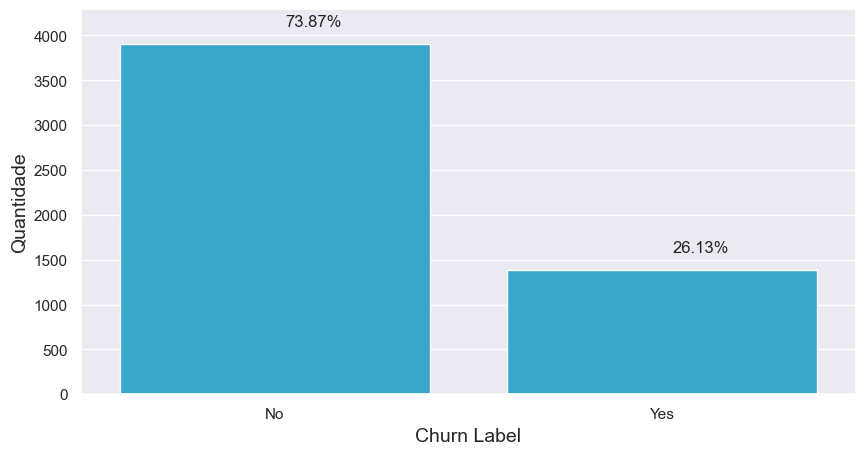

In [17]:
plota_barras(['Churn Label'], False, telco_churn_train, 1, 1)

#### 1. Em torno de 26% dos clientes possuem Cancelamento, sendo:


## 2.1) Hipótese I - Será que o Churn é influenciado pelas características dos clientes (Gênero, Relacionamento, Número de Dependentes e Idade, Tempo de Casa, Indicações, Cidade)?

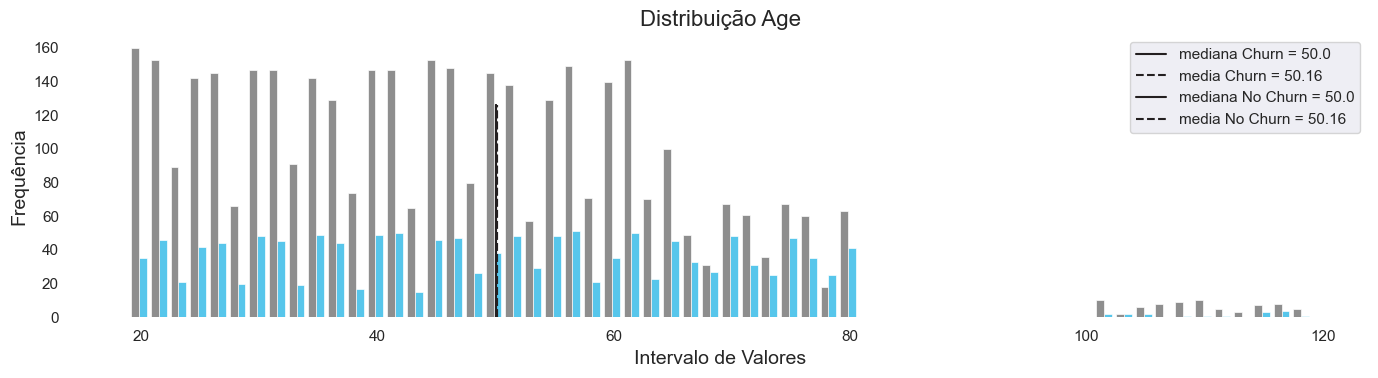

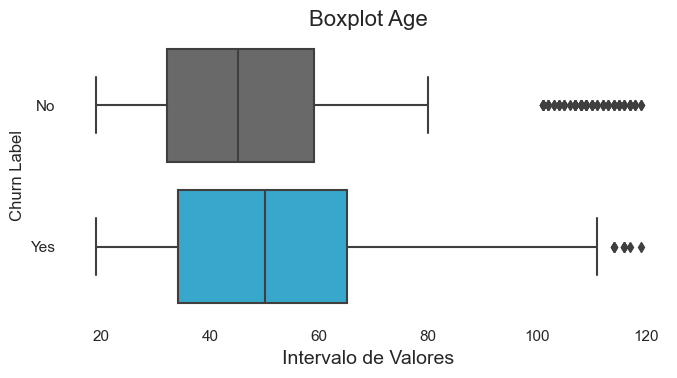

In [18]:
plota_histograma('Age', 'Churn Label', telco_churn_train, 'Age')
plota_boxplot('Age', 'Churn Label', telco_churn_train, 'Age')

#### 1. Logo de cara, nota-se a presença de alguns Outliers Superiores com idades avançadas entre 100 a 120 anos.

#### 2. Por conta da idade avançada, a probabilidade de terceiros tomando as decisões de cancelarem ou não os serviços no nome dos proprietários é alta, portanto, eles podem passar um viés errado sobre o Cancelamento. Dado isso, decidiu-se retirá-los da amostra.

In [19]:
qt_outliers = telco_churn_train.loc[telco_churn_train.Age > 100]['Customer ID'].unique().shape[0]
qt_total = telco_churn_train['Customer ID'].unique().shape[0]

telco_churn_train_outliers = telco_churn_train.loc[telco_churn_train.Age > 100]['Customer ID'].unique()

print(f'Remoção de {round((qt_outliers/qt_total)*100, 2)}% do Dataset')
telco_churn_train = telco_churn_train.loc[~telco_churn_train['Customer ID'].isin(telco_churn_train_outliers)]

qt_total = telco_churn_train['Customer ID'].unique().shape[0]
print(f'Agora, o Dataset tem {qt_total} registros')

Remoção de 1.7% do Dataset
Agora, o Dataset tem 5192 registros


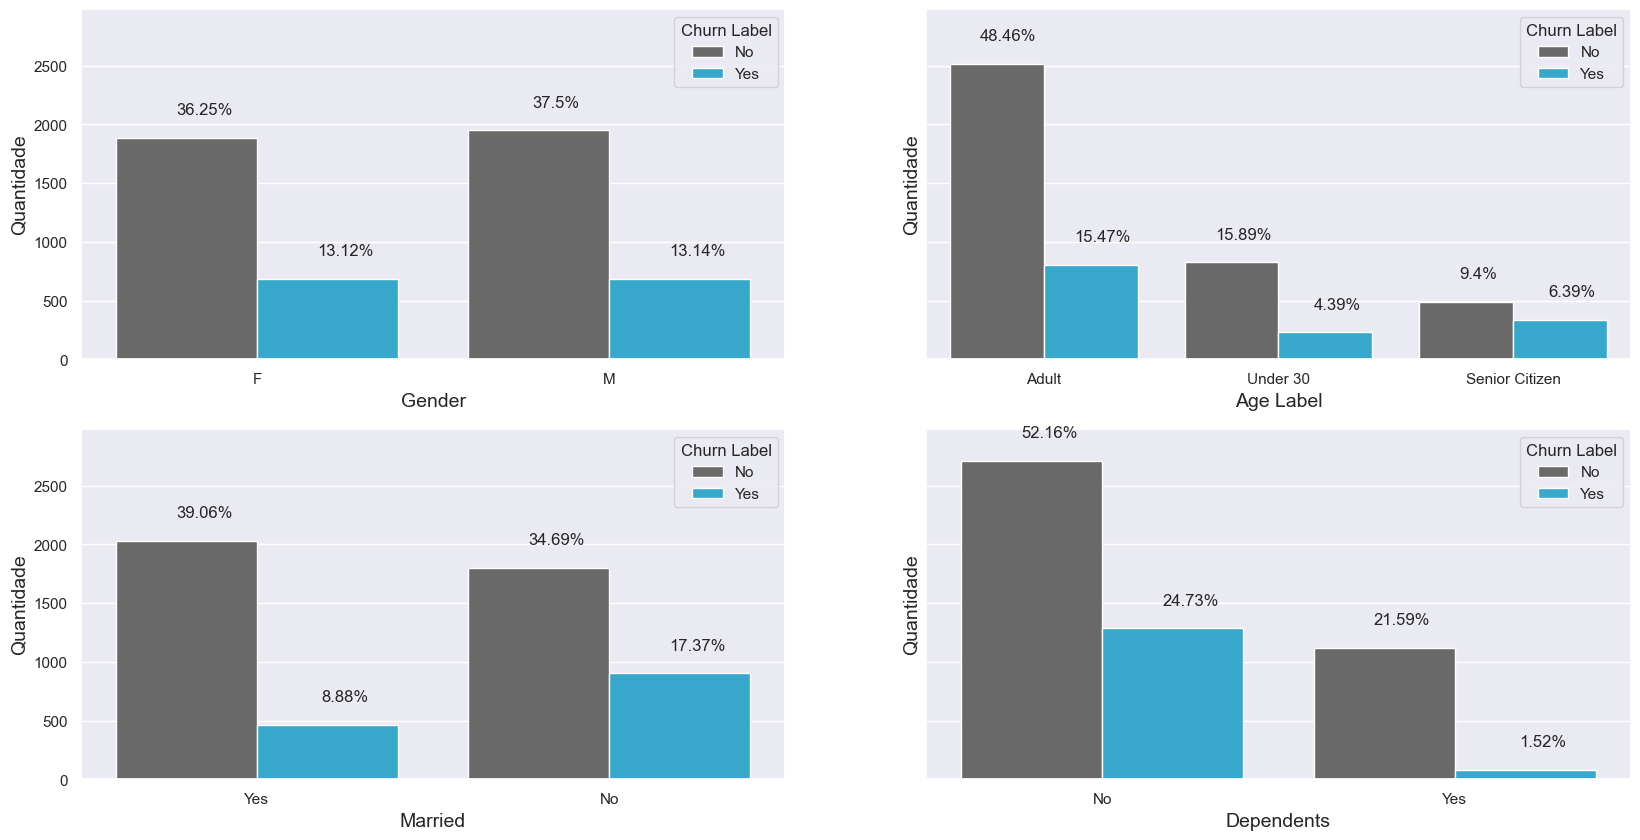

In [20]:
plota_barras(['Gender', 'Age Label', 'Married', 'Dependents'], 'Churn Label', telco_churn_train, 2, 2)

#### 1. Gênero: aparentemente, o Gênero não é um fator importante para Cancelamento, dado o comportamento do gráfico.

#### 2. Idade: pessoas idosas (65 anos ou mais) possuem elevado índice de Cancelamento em comparação com pessoas mais jovens, pois há em torno de 1/3 de Cancelamento para Adultos e Jovens com menos de 30 anos.

#### 3. Casamento e Número de Depentes: Pessoas solteiras ou sem dependentes também tendem a ter mais Cancelamentos, visto que é uma ação que dependete única e exclusivamente dela como a própria categoria sugere.

## 2.2) Hipótese II - Será que o Churn é influenciado pelo Contrato, Meio de Pagamento, Tempo de Casa ou Serviços? 

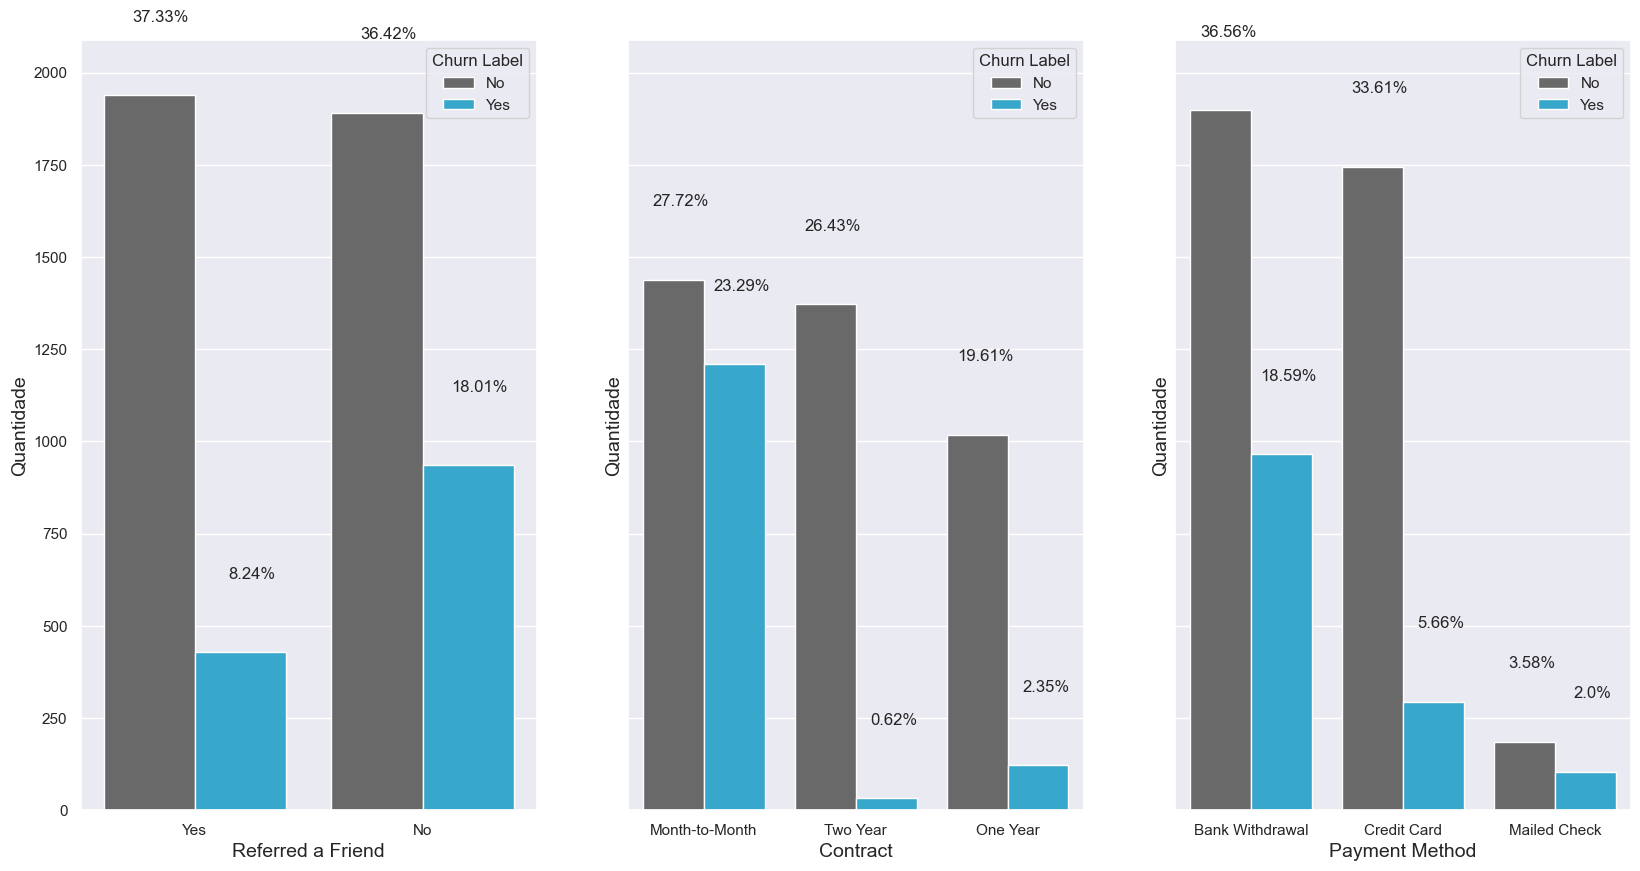

In [21]:
plota_barras(['Referred a Friend', 'Contract', 'Payment Method'], 'Churn Label', telco_churn_train, 1, 3)

#### 1. Pessoas que nunca recomendaram a empresa para um amigo ou familiar aparentam ter mais chance de aderirem ao Cancelamento. Faz sentido, dado que a falta de recomendações pode significar insatisfação com os serviços.

#### 2. Pessoas as quais costumam pagar com saques bancários tem maior propensão ao Cancelamento. Pela natural evolução tecnológica nos meios de pagamento, talvez haja um movimento interno da empresa para incentivar novos meios de pagamentos e, dado essa situação, causou um descontentamento nos clientes.

#### 3. Definitivamente contratos mais longos tendem a ter taxas de Cancelamento muito menores, todavia, este não é o único motivo. 



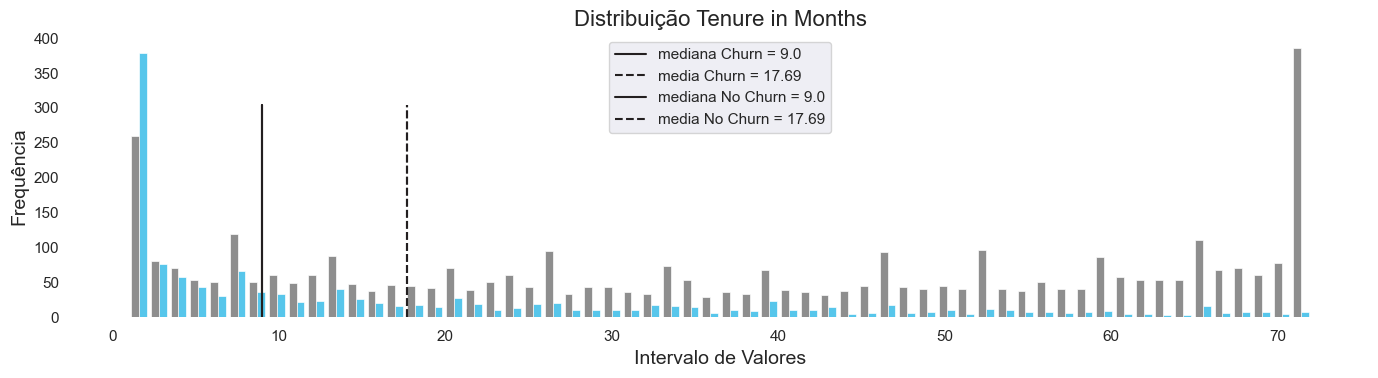

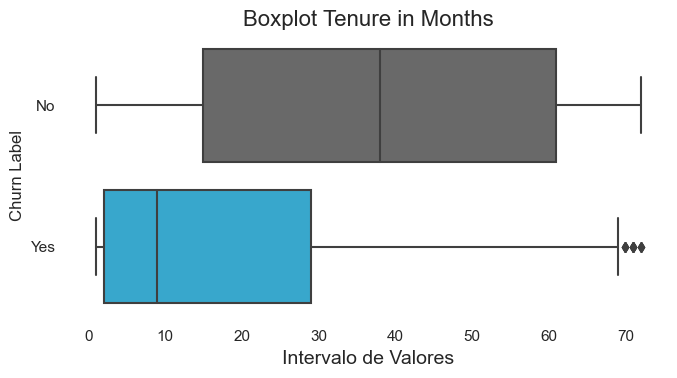

In [22]:
plota_histograma('Tenure in Months', 'Churn Label', telco_churn_train, 'Tenure in Months')
plota_boxplot('Tenure in Months', 'Churn Label', telco_churn_train, 'Tenure in Months')

#### 1. O tempo de "casa" denifitvamente é um fator importante, dado que há maior permanência em clientes mais antigos.

### 2) Serviços e Streaming

Phone Service -> Se o cliente contrata o serviço de telefonia

Multiple Lines -> Indica se o cliente contrata várias linhas telefônicas com a empresa: Sim, Não

Internet Service -> Indica se o cliente contrata o serviço de Internet 

Online Security -> Indica se o cliente assina um serviço de segurança online 

Online Backup -> Indica se o cliente assina um serviço de backup 

Device Protection Plan -> Indica se o cliente assina um plano de proteção do dispositivo

Premium Tech Support -> Indica se o cliente assina um plano de suporte técnico adicional

Streaming TV -> Indica se o cliente utiliza sua Internet para utilizar TV de Provedores Externos

Streaming Movies -> Indica se o cliente  utiliza sua Internet para utilizar Filmes de Provedores Externos

Streaming Music -> Indica se o cliente utiliza sua Internet para utilizar Músicas de Provedores Externos

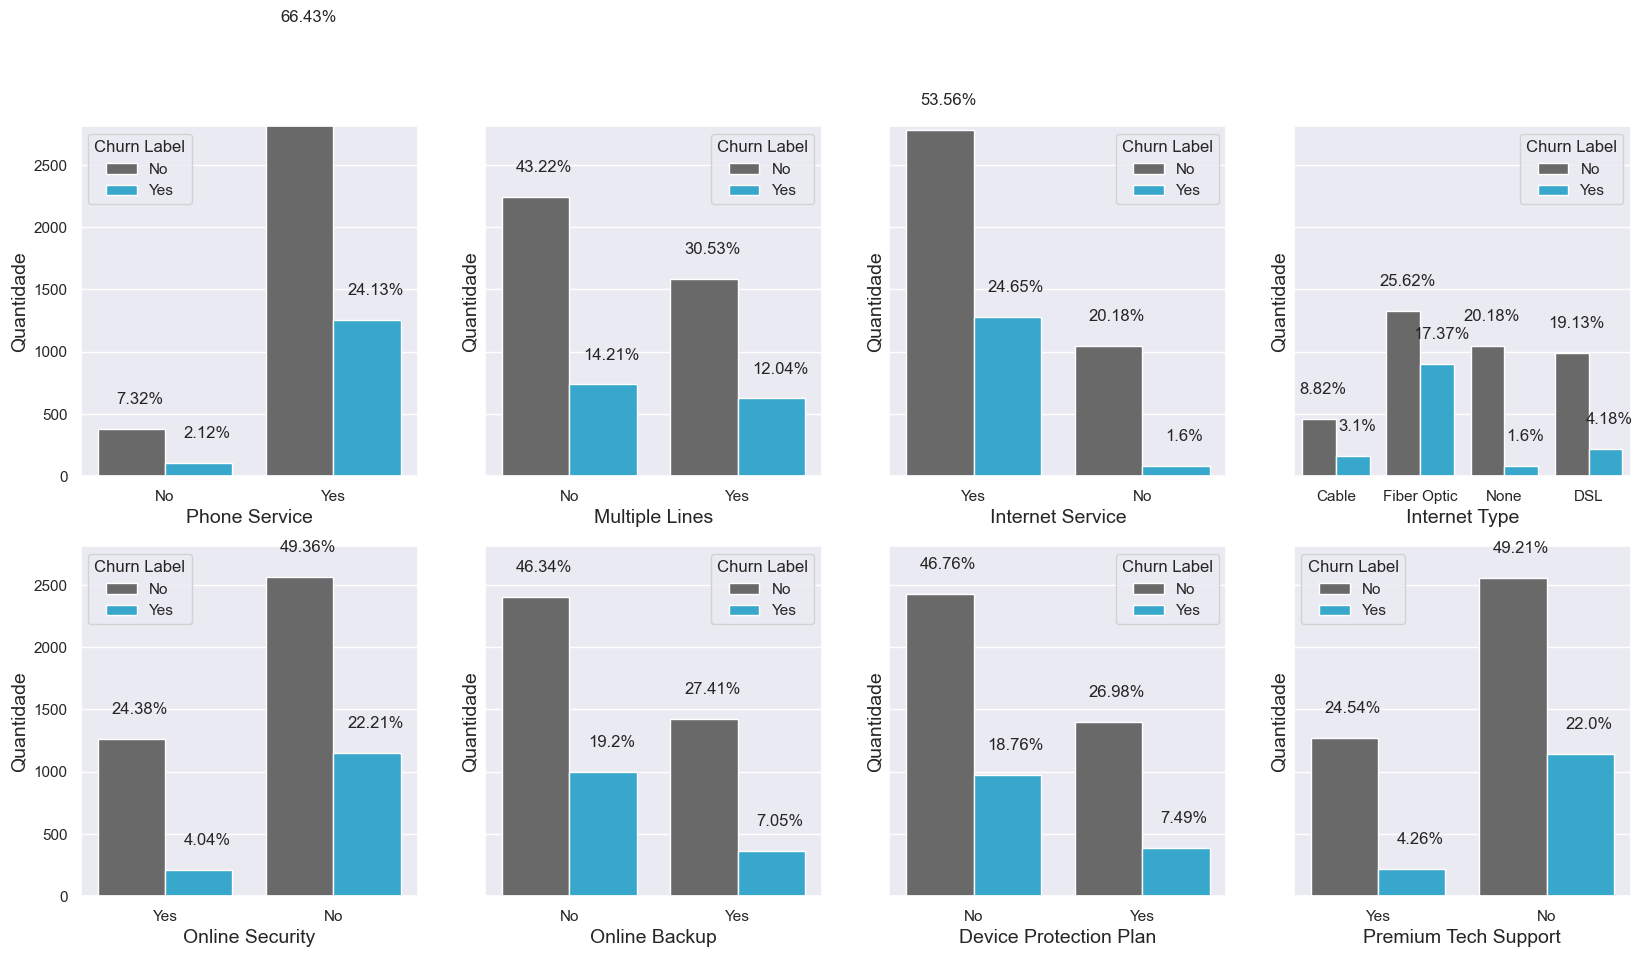

In [23]:
plota_barras(['Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support'], 'Churn Label', telco_churn_train, 2, 4)

#### 1. Quem assina Serviço Telefônico e Internet obviamente possuem chances muito maiores de Cancelamento, todavia, nota-se que assinantes de Internet de Fibra Ótica tem maior taxa.

#### 2. Pessoas que não contratam serviços como Segurança Online, Backup Online, Porteção de Dispositivo e Auxílio Técnico Premium também cancelam mais. 

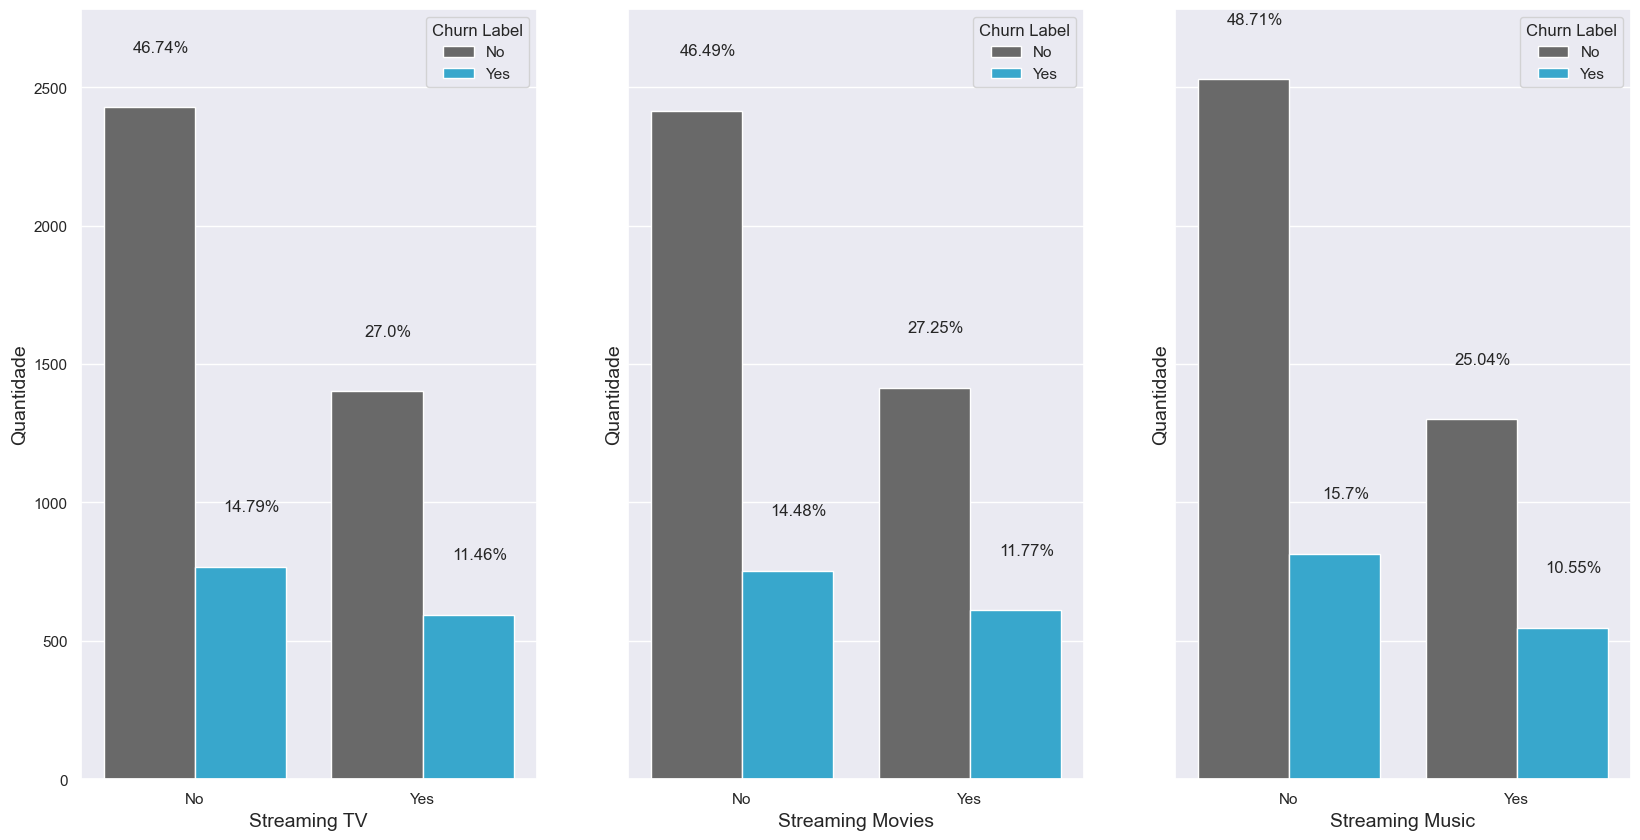

In [24]:
plota_barras(['Streaming TV', 'Streaming Movies', 'Streaming Music'], 'Churn Label', telco_churn_train, 1, 3)

#### 1. Não notou-se nenhum padrão em relação aos tipos de Streamming, entretanto, pessoas que possuem essas assinaturas tem alta taxa de cancelamento.

# <font color='red' style='font-size: 40px;'> 3.0 Pré-Processamento </font>
<hr style='border: 2px solid red;'>

## 3.1) Definição das Variáveis que entrarão no modelo

In [25]:
telco_churn_train_processed = variaveis_iniciais(['Customer ID', 'Age', 'Age Label', 'Number of Dependents'], 'Churn Label', telco_churn_train)
telco_churn_test_processed = variaveis_iniciais(['Customer ID', 'Age', 'Age Label', 'Number of Dependents'], 'Churn Label', telco_churn_test)

## 3.2) Separação entre Features e Target 

In [26]:
x_train = telco_churn_train_processed.drop('churn_label', axis = 1)
y_train = telco_churn_train_processed['churn_label']
x_test = telco_churn_test_processed.drop('churn_label', axis = 1)
y_test = telco_churn_test_processed['churn_label']
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5192, 24)
(5192,)
(1761, 24)
(1761,)


#### 1. As demais etapas de Pre-Processamento serão aplicadas diretamente nas funções de cada Modelo através de Pipelines

# <font color='red' style='font-size: 40px;'> 4.0 Aplicação de Modelos de Machine Learning </font>
<hr style='border: 2px solid red;'>

## 4.1) Aplicação de Modelos

In [27]:
regressao_logistica_predict_train = regressao_logistica(x_train, y_train, x_test, False)[0]
regressao_logistica_predict_test = regressao_logistica(x_train, y_train, x_test, False)[1]


support_vector_machines_predict_train = support_vector_machines(x_train, y_train, x_test, False)[0]
support_vector_machines_predict_test = support_vector_machines(x_train, y_train, x_test, False)[1]


random_forest_predict_train = random_forest(x_train, y_train, x_test, False)[0]
random_forest_predict_test = random_forest(x_train, y_train, x_test, False)[1]


xgboost_predict_train = xgboost(x_train, y_train, x_test, False)[0]
xgboost_predict_test = xgboost(x_train, y_train, x_test, False)[1]


## 4.2) Avaliação de Métricas 

In [74]:
metricas_regressao_logistica = metricas('Regressão Logística', y_train, regressao_logistica_predict_train, y_test, regressao_logistica_predict_test)
metricas_support_vector_machines = metricas('SVC', y_train, support_vector_machines_predict_train, y_test, support_vector_machines_predict_test)
metricas_random_forest = metricas('Random Forest', y_train, random_forest_predict_train, y_test, random_forest_predict_test)
metricas_xgboost = metricas('XGBoost', y_train, xgboost_predict_train, y_test, xgboost_predict_test)

metricas_regressao_logistica_validacao_cruzada = validacao_cruzada(x_train, y_train, 5, 'Regressão Logística')
metricas_support_vector_machines_validacao_cruzada = validacao_cruzada(x_train, y_train, 5, 'SVC')
metricas_random_forest_validacao_cruzada = validacao_cruzada(x_train, y_train, 5, 'Random Forest')
metricas_xgboost_validacao_cruzada = validacao_cruzada(x_train, y_train, 5, 'XGBoost')

metricas_hold_out = metricas_modelos_juntos([metricas_regressao_logistica, metricas_support_vector_machines, metricas_random_forest, metricas_xgboost]).reset_index()
metricas_validacao_cruzada = metricas_modelos_juntos([metricas_regressao_logistica_validacao_cruzada, metricas_support_vector_machines_validacao_cruzada, metricas_random_forest_validacao_cruzada, metricas_xgboost_validacao_cruzada]).reset_index()

print('Métricas Finais')
metricas_finais = metricas_modelos_juntos([metricas_hold_out, metricas_validacao_cruzada]).sort_index()
metricas_finais

Métricas Finais


,Acuracia,Precisao,Recall,F1,Roc_Curve,Etapa
Classificador,,,,,,
Random Forest,0.79,0.57,0.85,0.68,0.81,treino
Random Forest,0.78,0.57,0.82,0.67,0.79,teste
Random Forest,0.78,0.55,0.82,0.78,0.87,validacao_cruzada
Regressão Logística,0.77,0.53,0.83,0.65,0.79,treino
Regressão Logística,0.76,0.55,0.82,0.66,0.78,teste
Regressão Logística,0.76,0.53,0.83,0.76,0.87,validacao_cruzada
SVC,0.75,0.51,0.83,0.63,0.77,treino
SVC,0.75,0.53,0.83,0.65,0.77,teste
SVC,0.75,0.51,0.83,0.75,0.86,validacao_cruzada


#### 1. As principais métricas de avaliação são a Recall e a Roc-Curve, pois além dos nossos dados serem desbalanceados, nossa maior preocupação é classificar os clientes de maior probabilidade de Cancelamento para que possamos abordá-los de forma estratégica para retê-los.

#### 2. Por conta disso, a melhor métrica é a Recall, dado que ela reflete a taxa de classes positivas que são verdadeiramente positivas.

#### 3. Todos os modelos tiveram desempenho bem próximos, portanto, há a possibilidade de escolhermos qualquer um deles.

#### 4. Embora os Modelos Ensemble (Random Forest e XGBoost) tenham se saído um pouco melhor, dado as características referentes ao baixo custo, fácil explicabilidade matemática e rápido tempo de processamento, escolheu-se a Regressão Logística como Modelo a ser levado adiante e otimizado.

# <font color='red' style='font-size: 40px;'> 5.0 Otimização da Modelagem  </font>
<hr style='border: 2px solid red;'>

## 5.1) Seleção de Features 

## 5.2) Tuning de Hiperparâmetros

# <font color='red' style='font-size: 40px;'> 6.0 Aplicando Modelo no Dataset de Teste </font>
<hr style='border: 2px solid red;'>

# <font color='red' style='font-size: 40px;'> 7.0 Consolidação dos Resultados </font>
<hr style='border: 2px solid red;'>